In [3]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt
import re
from matplotlib.ticker import MaxNLocator
import squarify
import textwrap3
from textwrap3 import wrap
import random2
from matplotlib_venn import venn2, venn3, venn3_circles
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

pd.set_option('display.max_colwidth', 100)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [4]:
analysis = '/work/projects/ecosystem_biology/archaea/coevolution/analysis'
pics = '/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/pics'

#### import unique archaea proteins

In [5]:
unique_gut = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/unique_gut_proteins.csv')
unique_gut.cluster = 'a_' + unique_gut.cluster.astype(str)

#### functional annotations of bacteria

- annotated with KEGG
- only protein families with >= 10 annotated proteins

created in *bacteria_protein_enrichment_in_gut.ipynb*

In [6]:
functions_bac = pd.read_csv(analysis+'/intermediate_results/bacteria_kegg_gut_functions_annotation.csv',
           sep='\t')
functions_bac.drop_duplicates(['protein', 'cluster', 'id', 'description'], inplace=True)

#### functional annotation of archaea

- annotated with KEGG
- these are unique gut archaea == 
    
    1) clusters in which gut proteins cluster together with non-gut proteins are removed from the gut subset of proteins; 
    
    2) when annotated - remove gut proteins having kegg annotations present in non-gut annotations
- only protein families with >= 2 annotated proteins

In [7]:
functions_arch = pd.read_csv(analysis+'/intermediate_results/archaea_kegg_unique_gut_functions_annotation.csv',
           sep='\t')
functions_arch.drop_duplicates(['protein', 'cluster', 'id', 'description'], inplace=True)
functions_arch = functions_arch[['protein', 'cluster', 'id', 'description']]
functions_arch['cluster'] = 'a_' + functions_arch['cluster'].astype(str)

#### import databases for protein annotation

In [8]:
# ec = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_ec.tsv", 
#             delimiter="\t", header=None, names=['protein', 'id', 'description'])
eggnog = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_eggnog.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])
# pfam = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_pfam.tsv", 
#             delimiter="\t", header=None, names=['protein', 'id', 'description'])
# kegg = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_kegg.tsv", 
#             delimiter="\t", header=None, names=['protein', 'id', 'description'])


# ec_bac = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/bacteria/bacteria_annot_ec.tsv", 
#             delimiter="\t", header=None, names=['protein', 'id', 'description'])
eggnog_bac = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/bacteria/bacteria_annot_eggnogsame_kegg_proteins.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])
eggnog_bac_Gla = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/bacteria/bacteria_annot_eggnog_matrix_Gla.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])
# pfam_bac = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/bacteria/bacteria_annot_pfam.tsv", 
#             delimiter="\t", header=None, names=['protein', 'id', 'description'])
# kegg_bac = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/bacteria/bacteria_annot_kegg.tsv", 
#             delimiter="\t", header=None, names=['protein', 'id', 'description'])

#### extract kegg ids shared between archaeal and bacterial proteins

In [9]:
id_cluster_bac = functions_bac[['id', 'cluster']].drop_duplicates(['id', 'cluster'])
id_cluster_arch = functions_arch[['id', 'cluster']].drop_duplicates(['id', 'cluster'])

In [10]:
common_ids2clusters = pd.merge(id_cluster_bac,id_cluster_arch, on='id')
common_ids2clusters

id   cluster_x cluster_y
0     K19506   b_4683921  a_232524
1     K19506   b_2870162  a_232524
2     K19506   b_6365458  a_232524
3     K19506  b_10383251  a_232524
4     K19506   b_6029216  a_232524
...      ...         ...       ...
5115  K04578  b_10038932  a_170541
5116  K02449   b_4852848  a_201035
5117  K06577   b_1397727  a_132380
5118  K15044   b_1561924   a_38898
5119  K15809   b_6145928  a_206021

[5120 rows x 3 columns]

In [11]:
common_ids2clusters.cluster_y.nunique()

131

#### list of shared kegg ids

In [12]:
common_ids = common_ids2clusters[['id']].drop_duplicates()
common_ids.shape

(73, 1)

## Curate archaeal annotations

candidate arcahea

In [13]:
candidate_archaea = common_ids.merge(functions_arch)
candidate_archaea

id                      protein   cluster  \
0     K19506  GUT_GENOME278408.fasta_1462  a_232524   
1     K19506  GUT_GENOME135886.fasta_1623  a_232524   
2     K09974  GUT_GENOME085231.fasta_1776   a_64521   
3     K09974  GUT_GENOME103466.fasta_1756   a_64521   
4     K20262   GUT_GENOME232921.fasta_508  a_211970   
...      ...                          ...       ...   
1142  K06577  GUT_GENOME138236.fasta_1292  a_132380   
1143  K15044   GUT_GENOME048380.fasta_988   a_38898   
1144  K15044   GUT_GENOME048397.fasta_692   a_38898   
1145  K15809    GUT_GENOME163212.fasta_20  a_206021   
1146  K15809  GUT_GENOME253592.fasta_1086  a_206021   

                                                 description  
0     fructoselysine/glucoselysine PTS system EIIA component  
1     fructoselysine/glucoselysine PTS system EIIA component  
2                                    uncharacterized protein  
3                                    uncharacterized protein  
4                     dihydrophenazinedicarboxylate synthase  
...                                                      ...  
1142                           Kell blood group glycoprotein  
1143      Arf-GAP domain and FG repeats-containing protein 1  
1144      Arf-GAP domain and FG repeats-containing protein 1  
1145                               cis-muuroladiene synthase  
1146                               cis-muuroladiene synthase  

[1147 rows x 4 columns]

different clusters contain a different number of proteins

In [14]:
candidate_archaea.groupby('cluster').count()

id  protein  description
cluster                            
a_100893    3        3            3
a_102072    2        2            2
a_103470    2        2            2
a_104986    3        3            3
a_107930    2        2            2
...       ...      ...          ...
a_91313     6        6            6
a_92079     7        7            7
a_95845     2        2            2
a_95863   343      343          343
a_96889     3        3            3

[131 rows x 3 columns]

keep only protein families with >=5 proteins

31 protein families as a result

In [15]:
candidate_archaea_count = candidate_archaea\
.groupby(['cluster'], as_index=False)\
.agg({'protein':'count'})

candidate_archaea_count = candidate_archaea_count[candidate_archaea_count.protein>=5]

candidate_archaea_count.rename(columns={'protein':'total_clusters_count'}, inplace=True)

candidate_archaea_count.cluster.nunique()

31

new candidate archaea list with >=5 proteins in clusters

in total 909 proteins

In [16]:
candidate_archaea = candidate_archaea.merge(candidate_archaea_count, on=['cluster']) # 909 proteins
candidate_archaea

id                      protein   cluster  \
0    K19082   GUT_GENOME103991.fasta_782   a_60600   
1    K19082    GUT_GENOME074072.fasta_78   a_60600   
2    K19082   GUT_GENOME161846.fasta_170   a_60600   
3    K19082   GUT_GENOME161057.fasta_907   a_60600   
4    K19082   GUT_GENOME162792.fasta_580   a_60600   
..      ...                          ...       ...   
904  K06577  GUT_GENOME192598.fasta_1419  a_132380   
905  K06577   GUT_GENOME161035.fasta_978  a_132380   
906  K06577  GUT_GENOME068702.fasta_1363  a_132380   
907  K06577   GUT_GENOME239592.fasta_998  a_132380   
908  K06577  GUT_GENOME138236.fasta_1292  a_132380   

                                                                 description  \
0    two-component system, OmpR family, response regulator protein BraR/BceR   
1    two-component system, OmpR family, response regulator protein BraR/BceR   
2    two-component system, OmpR family, response regulator protein BraR/BceR   
3    two-component system, OmpR family, response regulator protein BraR/BceR   
4    two-component system, OmpR family, response regulator protein BraR/BceR   
..                                                                       ...   
904                                            Kell blood group glycoprotein   
905                                            Kell blood group glycoprotein   
906                                            Kell blood group glycoprotein   
907                                            Kell blood group glycoprotein   
908                                            Kell blood group glycoprotein   

     total_clusters_count  
0                       8  
1                       8  
2                       8  
3                       8  
4                       8  
..                    ...  
904                     7  
905                     7  
906                     7  
907                     7  
908                     7  

[909 rows x 5 columns]

now, if there are multiple annotations (kegg ids) withing one cluster, remove the minority of proteins

In [17]:
candidate_archaea_count_2 = candidate_archaea\
.groupby(['cluster', 'id'], as_index=False)\
.agg({'protein':'count'})

candidate_archaea_count_2.rename(columns={'protein':'id_count'}, inplace=True)

In [18]:
candidate_archaea_2 = candidate_archaea.merge(candidate_archaea_count_2, on=['cluster', 'id'])
candidate_archaea_2

id                      protein   cluster  \
0    K19082   GUT_GENOME103991.fasta_782   a_60600   
1    K19082    GUT_GENOME074072.fasta_78   a_60600   
2    K19082   GUT_GENOME161846.fasta_170   a_60600   
3    K19082   GUT_GENOME161057.fasta_907   a_60600   
4    K19082   GUT_GENOME162792.fasta_580   a_60600   
..      ...                          ...       ...   
904  K06577  GUT_GENOME192598.fasta_1419  a_132380   
905  K06577   GUT_GENOME161035.fasta_978  a_132380   
906  K06577  GUT_GENOME068702.fasta_1363  a_132380   
907  K06577   GUT_GENOME239592.fasta_998  a_132380   
908  K06577  GUT_GENOME138236.fasta_1292  a_132380   

                                                                 description  \
0    two-component system, OmpR family, response regulator protein BraR/BceR   
1    two-component system, OmpR family, response regulator protein BraR/BceR   
2    two-component system, OmpR family, response regulator protein BraR/BceR   
3    two-component system, OmpR family, response regulator protein BraR/BceR   
4    two-component system, OmpR family, response regulator protein BraR/BceR   
..                                                                       ...   
904                                            Kell blood group glycoprotein   
905                                            Kell blood group glycoprotein   
906                                            Kell blood group glycoprotein   
907                                            Kell blood group glycoprotein   
908                                            Kell blood group glycoprotein   

     total_clusters_count  id_count  
0                       8         8  
1                       8         8  
2                       8         8  
3                       8         8  
4                       8         8  
..                    ...       ...  
904                     7         7  
905                     7         7  
906                     7         7  
907                     7         7  
908                     7         7  

[909 rows x 6 columns]

add a column *ratio* showing the percentage of different annotations with one protein family

if there are <10% annotations of a kind in a protein familiy, or it's the only annotation (!=1), remove such proteins

In [19]:
candidate_archaea_2['ratio'] = \
candidate_archaea_2['id_count']/candidate_archaea_2['total_clusters_count']

candidate_archaea_2[(candidate_archaea_2.ratio>=0.1) 
                    & (candidate_archaea_2.id_count!=1)]\
.sort_values('ratio', ascending=True).head()

id                      protein  cluster  \
0    K19082   GUT_GENOME103991.fasta_782  a_60600   
598  K23498  GUT_GENOME067252.fasta_1679  a_74163   
599  K23498  GUT_GENOME093033.fasta_1104  a_74163   
600  K23498  GUT_GENOME068480.fasta_1254  a_74163   
601  K11234  GUT_GENOME192495.fasta_1046   a_3530   

                                                                 description  \
0    two-component system, OmpR family, response regulator protein BraR/BceR   
598                                             peptide chain release factor   
599                                             peptide chain release factor   
600                                             peptide chain release factor   
601                                            mating pheromone alpha-factor   

     total_clusters_count  id_count  ratio  
0                       8         8    1.0  
598                    10        10    1.0  
599                    10        10    1.0  
600                    10        10    1.0  
601                   153       153    1.0

visualize count of different annotations within one cluster against the ratio

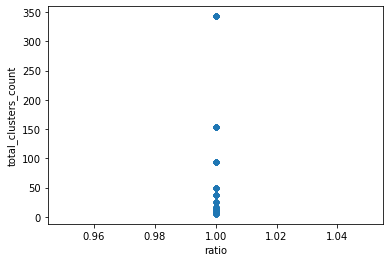

In [20]:
candidate_archaea_2.plot('ratio', 'total_clusters_count', kind='scatter')

### resulting numbers

In [21]:
candidate_archaea_fin = \
candidate_archaea_2[(candidate_archaea_2.ratio>=0.1) & (candidate_archaea_2.id_count!=1)]

candidate_archaea_fin

id                      protein   cluster  \
0    K19082   GUT_GENOME103991.fasta_782   a_60600   
1    K19082    GUT_GENOME074072.fasta_78   a_60600   
2    K19082   GUT_GENOME161846.fasta_170   a_60600   
3    K19082   GUT_GENOME161057.fasta_907   a_60600   
4    K19082   GUT_GENOME162792.fasta_580   a_60600   
..      ...                          ...       ...   
904  K06577  GUT_GENOME192598.fasta_1419  a_132380   
905  K06577   GUT_GENOME161035.fasta_978  a_132380   
906  K06577  GUT_GENOME068702.fasta_1363  a_132380   
907  K06577   GUT_GENOME239592.fasta_998  a_132380   
908  K06577  GUT_GENOME138236.fasta_1292  a_132380   

                                                                 description  \
0    two-component system, OmpR family, response regulator protein BraR/BceR   
1    two-component system, OmpR family, response regulator protein BraR/BceR   
2    two-component system, OmpR family, response regulator protein BraR/BceR   
3    two-component system, OmpR family, response regulator protein BraR/BceR   
4    two-component system, OmpR family, response regulator protein BraR/BceR   
..                                                                       ...   
904                                            Kell blood group glycoprotein   
905                                            Kell blood group glycoprotein   
906                                            Kell blood group glycoprotein   
907                                            Kell blood group glycoprotein   
908                                            Kell blood group glycoprotein   

     total_clusters_count  id_count  ratio  
0                       8         8    1.0  
1                       8         8    1.0  
2                       8         8    1.0  
3                       8         8    1.0  
4                       8         8    1.0  
..                    ...       ...    ...  
904                     7         7    1.0  
905                     7         7    1.0  
906                     7         7    1.0  
907                     7         7    1.0  
908                     7         7    1.0  

[909 rows x 7 columns]

In [22]:
candidate_archaea_fin.protein.nunique()

909

## Curate bacterial annotations

candidate bacteria

In [23]:
candidate_bac = common_ids.merge(functions_bac)
candidate_bac

id                 protein    cluster  \
0      K19506  GUT_GENOME001575_1_140  b_4683921   
1      K19506      3300007353_12_1571  b_4683921   
2      K19506  GUT_GENOME284747_39_17  b_4683921   
3      K19506  GUT_GENOME204926_16_52  b_4683921   
4      K19506  GUT_GENOME000917_7_101  b_4683921   
...       ...                     ...        ...   
69972  K15809  GUT_GENOME199423_46_12  b_6145928   
69973  K15809   GUT_GENOME000831_5_69  b_6145928   
69974  K15809   GUT_GENOME028831_6_74  b_6145928   
69975  K15809  GUT_GENOME058845_1_135  b_6145928   
69976  K15809   GUT_GENOME054189_5_74  b_6145928   

                                                  description  
0      fructoselysine/glucoselysine PTS system EIIA component  
1      fructoselysine/glucoselysine PTS system EIIA component  
2      fructoselysine/glucoselysine PTS system EIIA component  
3      fructoselysine/glucoselysine PTS system EIIA component  
4      fructoselysine/glucoselysine PTS system EIIA component  
...                                                       ...  
69972                               cis-muuroladiene synthase  
69973                               cis-muuroladiene synthase  
69974                               cis-muuroladiene synthase  
69975                               cis-muuroladiene synthase  
69976                               cis-muuroladiene synthase  

[69977 rows x 4 columns]

different clusters contain a different number of proteins

In [24]:
candidate_bac.groupby('cluster').count()

id  protein  description
cluster                             
b_10007650  21       21           21
b_10011542  19       19           19
b_10038916  28       28           28
b_10038917  32       32           32
b_10038932  11       11           11
...         ..      ...          ...
b_9956428   20       20           20
b_9960132    3        3            3
b_997696    24       24           24
b_997808    16       16           16
b_9981406   22       22           22

[2502 rows x 3 columns]

keep only protein families with >=10 proteins

2281 protein families as a result

In [25]:
candidate_bac_count = candidate_bac\
.groupby(['cluster'], as_index=False)\
.agg({'protein':'count'})

candidate_bac_count = candidate_bac_count[candidate_bac_count.protein>=10]

candidate_bac_count.rename(columns={'protein':'total_clusters_count'}, inplace=True)

candidate_bac_count.cluster.nunique()

2281

new candidate archaea list with >=5 proteins in clusters

in total 68766 proteins

In [26]:
candidate_bac = candidate_bac.merge(candidate_bac_count, on=['cluster']) 
candidate_bac

id                 protein    cluster  \
0      K19506  GUT_GENOME001575_1_140  b_4683921   
1      K19506      3300007353_12_1571  b_4683921   
2      K19506  GUT_GENOME284747_39_17  b_4683921   
3      K19506  GUT_GENOME204926_16_52  b_4683921   
4      K19506  GUT_GENOME000917_7_101  b_4683921   
...       ...                     ...        ...   
68761  K15809  GUT_GENOME199423_46_12  b_6145928   
68762  K15809   GUT_GENOME000831_5_69  b_6145928   
68763  K15809   GUT_GENOME028831_6_74  b_6145928   
68764  K15809  GUT_GENOME058845_1_135  b_6145928   
68765  K15809   GUT_GENOME054189_5_74  b_6145928   

                                                  description  \
0      fructoselysine/glucoselysine PTS system EIIA component   
1      fructoselysine/glucoselysine PTS system EIIA component   
2      fructoselysine/glucoselysine PTS system EIIA component   
3      fructoselysine/glucoselysine PTS system EIIA component   
4      fructoselysine/glucoselysine PTS system EIIA component   
...                                                       ...   
68761                               cis-muuroladiene synthase   
68762                               cis-muuroladiene synthase   
68763                               cis-muuroladiene synthase   
68764                               cis-muuroladiene synthase   
68765                               cis-muuroladiene synthase   

       total_clusters_count  
0                        22  
1                        22  
2                        22  
3                        22  
4                        22  
...                     ...  
68761                    16  
68762                    16  
68763                    16  
68764                    16  
68765                    16  

[68766 rows x 5 columns]

In [27]:
candidate_bac.id.nunique()

63

now, if there are multiple annotations (kegg ids) withing one cluster, remove the minority of proteins

In [28]:
candidate_bac_count_2 = candidate_bac\
.groupby(['cluster', 'id'], as_index=False)\
.agg({'protein':'count'})

candidate_bac_count_2.rename(columns={'protein':'id_count'}, inplace=True)

In [29]:
candidate_bac_2 = candidate_bac.merge(candidate_bac_count_2, on=['cluster', 'id'])
candidate_bac_2

id                 protein    cluster  \
0      K19506  GUT_GENOME001575_1_140  b_4683921   
1      K19506      3300007353_12_1571  b_4683921   
2      K19506  GUT_GENOME284747_39_17  b_4683921   
3      K19506  GUT_GENOME204926_16_52  b_4683921   
4      K19506  GUT_GENOME000917_7_101  b_4683921   
...       ...                     ...        ...   
68761  K15809  GUT_GENOME199423_46_12  b_6145928   
68762  K15809   GUT_GENOME000831_5_69  b_6145928   
68763  K15809   GUT_GENOME028831_6_74  b_6145928   
68764  K15809  GUT_GENOME058845_1_135  b_6145928   
68765  K15809   GUT_GENOME054189_5_74  b_6145928   

                                                  description  \
0      fructoselysine/glucoselysine PTS system EIIA component   
1      fructoselysine/glucoselysine PTS system EIIA component   
2      fructoselysine/glucoselysine PTS system EIIA component   
3      fructoselysine/glucoselysine PTS system EIIA component   
4      fructoselysine/glucoselysine PTS system EIIA component   
...                                                       ...   
68761                               cis-muuroladiene synthase   
68762                               cis-muuroladiene synthase   
68763                               cis-muuroladiene synthase   
68764                               cis-muuroladiene synthase   
68765                               cis-muuroladiene synthase   

       total_clusters_count  id_count  
0                        22        22  
1                        22        22  
2                        22        22  
3                        22        22  
4                        22        22  
...                     ...       ...  
68761                    16        16  
68762                    16        16  
68763                    16        16  
68764                    16        16  
68765                    16        16  

[68766 rows x 6 columns]

add a column *ratio* showing the percentage of different annotations with one protein family

if there are <10% annotations of a kind in a protein familiy, or it's less than 5 annotations (>=5), remove such proteins

In [30]:
candidate_bac_2['ratio'] = \
candidate_bac_2['id_count']/candidate_bac_2['total_clusters_count']

candidate_bac_2[(candidate_bac_2.ratio>=0.1) & (candidate_bac_2.id_count>=5)]\
.sort_values(['ratio'], ascending=True).head()

id                 protein     cluster  \
62649  K03278        3300029326_9_364  b_13816492   
62660  K03278   GUT_GENOME270485_9_41  b_13816492   
62659  K03278  GUT_GENOME178816_1_623  b_13816492   
62658  K03278       3300029181_7_1400  b_13816492   
62641  K03278  GUT_GENOME024138_2_161  b_13816492   

                                                           description  \
62649  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62660  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62659  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62658  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62641  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   

       total_clusters_count  id_count     ratio  
62649                    22        21  0.954545  
62660                    22        21  0.954545  
62659                    22        21  0.954545  
62658                    22        21  0.954545  
62641                    22        21  0.954545

visualize count of different annotations within one cluster against the ratio

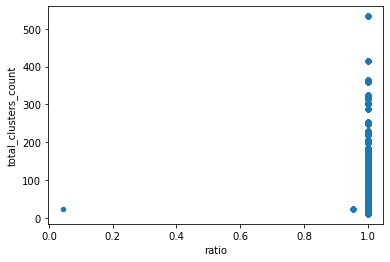

In [31]:
candidate_bac_2.plot('ratio', 'total_clusters_count', kind='scatter')

### resulting numbers

In [32]:
candidate_bac_fin = candidate_bac_2[(candidate_bac_2.ratio>=0.1) & (candidate_bac_2.id_count>=5)]
candidate_bac_fin

id                 protein    cluster  \
0      K19506  GUT_GENOME001575_1_140  b_4683921   
1      K19506      3300007353_12_1571  b_4683921   
2      K19506  GUT_GENOME284747_39_17  b_4683921   
3      K19506  GUT_GENOME204926_16_52  b_4683921   
4      K19506  GUT_GENOME000917_7_101  b_4683921   
...       ...                     ...        ...   
68761  K15809  GUT_GENOME199423_46_12  b_6145928   
68762  K15809   GUT_GENOME000831_5_69  b_6145928   
68763  K15809   GUT_GENOME028831_6_74  b_6145928   
68764  K15809  GUT_GENOME058845_1_135  b_6145928   
68765  K15809   GUT_GENOME054189_5_74  b_6145928   

                                                  description  \
0      fructoselysine/glucoselysine PTS system EIIA component   
1      fructoselysine/glucoselysine PTS system EIIA component   
2      fructoselysine/glucoselysine PTS system EIIA component   
3      fructoselysine/glucoselysine PTS system EIIA component   
4      fructoselysine/glucoselysine PTS system EIIA component   
...                                                       ...   
68761                               cis-muuroladiene synthase   
68762                               cis-muuroladiene synthase   
68763                               cis-muuroladiene synthase   
68764                               cis-muuroladiene synthase   
68765                               cis-muuroladiene synthase   

       total_clusters_count  id_count  ratio  
0                        22        22    1.0  
1                        22        22    1.0  
2                        22        22    1.0  
3                        22        22    1.0  
4                        22        22    1.0  
...                     ...       ...    ...  
68761                    16        16    1.0  
68762                    16        16    1.0  
68763                    16        16    1.0  
68764                    16        16    1.0  
68765                    16        16    1.0  

[68765 rows x 7 columns]

In [33]:
candidate_bac_fin.id.nunique()

63

## now intersect protein sets again

In [34]:
candidate_archaea_fin.cluster.nunique(), candidate_bac_fin.cluster.nunique()

(31, 2281)

compile a new list of shared kegg ids

In [35]:
common_ids2clusters_2 = pd.merge(candidate_bac_fin[['id', 'cluster']], 
                                 candidate_archaea_fin[['id', 'cluster']], 
                                 on='id')
common_ids2clusters_2.rename(columns={'cluster_x':'cluster_b',
                                     'cluster_y':'cluster_a'}, inplace=True)

In [36]:
common_ids2clusters_2[['id']].drop_duplicates().id.nunique()

20

In [37]:
common_ids2clusters_2.drop_duplicates().cluster_a.nunique()

27

In [38]:
# candidate_archaea_fin.merge(common_ids2clusters_2[['cluster_a']].drop_duplicates(), 
#                             left_on='cluster',
#                            right_on='cluster_a')[['protein', 'cluster']]\
# .to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_arch_GU_common_kegg_ids.tsv',
#        sep='\t', index=False, header=None)

In [39]:
# candidate_bac_fin.merge(common_ids2clusters_2[['cluster_b']].drop_duplicates(), 
#                             left_on='cluster',
#                            right_on='cluster_b')[['protein', 'cluster']]\
# .to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_bac_common_kegg_ids.tsv',
#        sep='\t', index=False, header=None) 

compile annotations of archaeal proteins with shared functions (curated *candidate_archaea_2*)

In [40]:
candidate_archaea_fin_annotations = common_ids2clusters_2[['id', 'cluster_a']].drop_duplicates(['id', 'cluster_a'])\
.rename(columns={'cluster_a':'cluster'})\
.merge(candidate_archaea_2, on=['id', 'cluster'])

candidate_archaea_fin_annotations

id  cluster                      protein  \
0    K19082  a_60600   GUT_GENOME103991.fasta_782   
1    K19082  a_60600    GUT_GENOME074072.fasta_78   
2    K19082  a_60600   GUT_GENOME161846.fasta_170   
3    K19082  a_60600   GUT_GENOME161057.fasta_907   
4    K19082  a_60600   GUT_GENOME162792.fasta_580   
..      ...      ...                          ...   
836  K19481  a_43431  GUT_GENOME040406.fasta_1109   
837  K19481  a_43431  GUT_GENOME040374.fasta_1370   
838  K19481  a_43431            3300029435_39_603   
839  K19481  a_43431  GUT_GENOME055714.fasta_1699   
840  K19481  a_43431  GUT_GENOME115540.fasta_1750   

                                                                 description  \
0    two-component system, OmpR family, response regulator protein BraR/BceR   
1    two-component system, OmpR family, response regulator protein BraR/BceR   
2    two-component system, OmpR family, response regulator protein BraR/BceR   
3    two-component system, OmpR family, response regulator protein BraR/BceR   
4    two-component system, OmpR family, response regulator protein BraR/BceR   
..                                                                       ...   
836                                                       matrix Gla protein   
837                                                       matrix Gla protein   
838                                                       matrix Gla protein   
839                                                       matrix Gla protein   
840                                                       matrix Gla protein   

     total_clusters_count  id_count  ratio  
0                       8         8    1.0  
1                       8         8    1.0  
2                       8         8    1.0  
3                       8         8    1.0  
4                       8         8    1.0  
..                    ...       ...    ...  
836                     7         7    1.0  
837                     7         7    1.0  
838                     7         7    1.0  
839                     7         7    1.0  
840                     7         7    1.0  

[841 rows x 7 columns]

In [41]:
abundant_functions_archaea = candidate_archaea_fin_annotations\
.groupby(['cluster', 'id', 'description'], as_index=False)\
.agg({'protein' : 'count'})\
.rename(columns={'protein':'count'})\
.sort_values('count', ascending=False)

abundant_functions_archaea.head(5)


cluster      id                                      description  count
26   a_95863  K14495                               F-box protein GID2    343
13    a_3530  K11234                    mating pheromone alpha-factor    153
14   a_37787  K10436     microtubule-associated protein, RP/EB family     94
6   a_159495  K02369  alpha-1,4-N-acetylglucosaminyltransferase EXTL2     38
23   a_80404  K19543             aminoglycoside 3'-phosphotransferase     25

same for bacterial proteins

In [42]:
candidate_bac_fin_annotations = common_ids2clusters_2[['id', 'cluster_b']].drop_duplicates(['id', 'cluster_b'])\
.rename(columns={'cluster_b':'cluster'})\
.merge(candidate_bac_2, on=['id', 'cluster'])

candidate_bac_fin_annotations.head()

id    cluster                  protein  \
0  K19082  b_7263830  GUT_GENOME103880_1_2225   
1  K19082  b_7263830    GUT_GENOME207848_3_31   
2  K19082  b_7263830    GUT_GENOME207939_4_30   
3  K19082  b_7263830    GUT_GENOME142402_3_32   
4  K19082  b_7263830   GUT_GENOME207842_2_319   

                                                               description  \
0  two-component system, OmpR family, response regulator protein BraR/BceR   
1  two-component system, OmpR family, response regulator protein BraR/BceR   
2  two-component system, OmpR family, response regulator protein BraR/BceR   
3  two-component system, OmpR family, response regulator protein BraR/BceR   
4  two-component system, OmpR family, response regulator protein BraR/BceR   

   total_clusters_count  id_count  ratio  
0                    18        18    1.0  
1                    18        18    1.0  
2                    18        18    1.0  
3                    18        18    1.0  
4                    18        18    1.0

In [43]:
abundant_functions_bac = candidate_bac_fin_annotations\
.groupby(['cluster', 'id', 'description'], as_index=False)\
.agg({'protein' : 'count'})\
.rename(columns={'protein':'count'})\
.sort_values('count', ascending=False)

abundant_functions_bac.head()

cluster      id  \
190  b_3211732  K19082   
125  b_1890262  K19082   
127  b_1961853  K23498   
187  b_3142316  K19082   
248  b_4305818  K19082   

                                                                 description  \
190  two-component system, OmpR family, response regulator protein BraR/BceR   
125  two-component system, OmpR family, response regulator protein BraR/BceR   
127                                             peptide chain release factor   
187  two-component system, OmpR family, response regulator protein BraR/BceR   
248  two-component system, OmpR family, response regulator protein BraR/BceR   

     count  
190    324  
125    302  
127    218  
187    167  
248    167

## Work with archaeal annotations and analyze the dendrogram

In [44]:
dendr_clusters = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/dendrogram_clusters_same_kegg.tsv')
dendr_clusters

cluster  count        ids
0          5    523   a_116925
1          5    523   a_121399
2          5    523   a_151581
3          5    523   a_159495
4          5    523    a_18692
..       ...    ...        ...
530        3      4    a_95863
531        2      2   a_135089
532        2      2    a_91313
533        4      2    a_43431
534        4      2  b_8534464

[535 rows x 3 columns]

In [45]:
dendr_clusters[dendr_clusters.cluster!=5]\
.merge(pd.concat([abundant_functions_archaea, abundant_functions_bac]), left_on='ids', right_on='cluster')\
.rename(columns = {
    'cluster_x' : 'cluster_dendrogram',
    'count_x' : 'count_dendrogram',
    'cluster_y' : 'cluster_PF',
    'count_y' : 'count'
})[['cluster_dendrogram', 'count_dendrogram','cluster_PF', 'id',
       'description', 'count']]

cluster_dendrogram  count_dendrogram cluster_PF      id  \
0                    1                 4   a_135737  K12706   
1                    1                 4    a_21044  K12706   
2                    1                 4    a_73547  K12706   
3                    1                 4    a_74498  K12706   
4                    3                 4   a_147408  K14495   
5                    3                 4    a_45460  K14495   
6                    3                 4    a_51418  K14495   
7                    3                 4    a_95863  K14495   
8                    2                 2   a_135089  K16195   
9                    2                 2    a_91313  K16195   
10                   4                 2    a_43431  K19481   
11                   4                 2  b_8534464  K19481   

                                                  description  count  
0                        novobiocin biosynthesis protein NovC     16  
1                        novobiocin biosynthesis protein NovC     12  
2                        novobiocin biosynthesis protein NovC      8  
3                        novobiocin biosynthesis protein NovC     12  
4                                          F-box protein GID2      8  
5                                          F-box protein GID2     11  
6                                          F-box protein GID2     15  
7                                          F-box protein GID2    343  
8   eukaryotic translation initiation factor 2-alpha kinase 2      9  
9   eukaryotic translation initiation factor 2-alpha kinase 2      6  
10                                         matrix Gla protein      7  
11                                         matrix Gla protein     11

check bacterial proteins with most abundant functions of bacteria in gut (exhibited by archaea):

In [46]:
dendr_5 = dendr_clusters[dendr_clusters.cluster==5]\
.merge(pd.concat([abundant_functions_archaea, abundant_functions_bac]), left_on='ids', right_on='cluster')\
.rename(columns = {
    'cluster_x' : 'cluster_dendrogram',
    'count_x' : 'count_dendrogram',
    'cluster_y' : 'cluster_PF',
    'count_y' : 'count'
})

# most abundant archaeal functions 
dendr_5[(dendr_5.description == 'F-box protein GID2') 
        | (dendr_5.description == 'mating pheromone alpha-factor') 
        | (dendr_5.description == 'microtubule-associated protein, RP/EB family') 
        | (dendr_5.description == 'alpha-1,4-N-acetylglucosaminyltransferase EXTL2') 
        | (dendr_5.description == "aminoglycoside 3'-phosphotransferase")]\
.sort_values(['description', 'count'], ascending=False)


cluster_dendrogram  count_dendrogram         ids  cluster_PF      id  \
10                    5               523     a_37787     a_37787  K10436   
346                   5               523   b_6144304   b_6144304  K10436   
180                   5               523    b_263702    b_263702  K10436   
9                     5               523      a_3530      a_3530  K11234   
215                   5               523   b_3362964   b_3362964  K11234   
14                    5               523     a_80404     a_80404  K19543   
320                   5               523   b_5609328   b_5609328  K19543   
3                     5               523    a_159495    a_159495  K02369   
381                   5               523   b_6681309   b_6681309  K02369   
115                   5               523  b_13426443  b_13426443  K14495   

                                         description  count  
10      microtubule-associated protein, RP/EB family     94  
346     microtubule-associated protein, RP/EB family     21  
180     microtubule-associated protein, RP/EB family     10  
9                      mating pheromone alpha-factor    153  
215                    mating pheromone alpha-factor     27  
14              aminoglycoside 3'-phosphotransferase     25  
320             aminoglycoside 3'-phosphotransferase     20  
3    alpha-1,4-N-acetylglucosaminyltransferase EXTL2     38  
381  alpha-1,4-N-acetylglucosaminyltransferase EXTL2     12  
115                               F-box protein GID2     20

In [47]:
abundant_functions_archaea.head(5)

cluster      id                                      description  count
26   a_95863  K14495                               F-box protein GID2    343
13    a_3530  K11234                    mating pheromone alpha-factor    153
14   a_37787  K10436     microtubule-associated protein, RP/EB family     94
6   a_159495  K02369  alpha-1,4-N-acetylglucosaminyltransferase EXTL2     38
23   a_80404  K19543             aminoglycoside 3'-phosphotransferase     25

Prepare to run smash on separate groups with **same function**

Run it for top 10 most abundant gut functions

In [48]:
abundant_functions_archaea_top_10 = candidate_archaea_fin_annotations\
.groupby(['id', 'description'], as_index=False)\
.agg({'protein' : 'count'})\
.rename(columns={'protein':'count'})\
.sort_values('count', ascending=False).head(10)

abundant_functions_archaea_top_10

id  \
8   K14495   
5   K11234   
4   K10436   
6   K12706   
1   K02369   
15  K19543   
11  K16195   
3   K09469   
18  K23498   
13  K19082   

                                                                description  \
8                                                        F-box protein GID2   
5                                             mating pheromone alpha-factor   
4                              microtubule-associated protein, RP/EB family   
6                                      novobiocin biosynthesis protein NovC   
1                           alpha-1,4-N-acetylglucosaminyltransferase EXTL2   
15                                     aminoglycoside 3'-phosphotransferase   
11                eukaryotic translation initiation factor 2-alpha kinase 2   
3                             2-aminoethylphosphonate-pyruvate transaminase   
18                                             peptide chain release factor   
13  two-component system, OmpR family, response regulator protein BraR/BceR   

    count  
8     377  
5     153  
4      94  
6      48  
1      38  
15     25  
11     15  
3      12  
18     10  
13      8

In [49]:
all_same_kegg_proteins = pd.concat([abundant_functions_archaea, abundant_functions_bac])
all_same_kegg_proteins

cluster      id  \
26      a_95863  K14495   
13       a_3530  K11234   
14      a_37787  K10436   
6      a_159495  K02369   
23      a_80404  K19543   
..          ...     ...   
34    b_1070382  K19082   
33   b_10701409  K17465   
284   b_4828162  K17465   
28   b_10680125  K19082   
117    b_143894  K09469   

                                                                 description  \
26                                                        F-box protein GID2   
13                                             mating pheromone alpha-factor   
14                              microtubule-associated protein, RP/EB family   
6                            alpha-1,4-N-acetylglucosaminyltransferase EXTL2   
23                                      aminoglycoside 3'-phosphotransferase   
..                                                                       ...   
34   two-component system, OmpR family, response regulator protein BraR/BceR   
33                                 D-glucosaminate PTS system EIIB component   
284                                D-glucosaminate PTS system EIIB component   
28   two-component system, OmpR family, response regulator protein BraR/BceR   
117                            2-aminoethylphosphonate-pyruvate transaminase   

     count  
26     343  
13     153  
14      94  
6       38  
23      25  
..     ...  
34      10  
33      10  
284     10  
28      10  
117     10  

[532 rows x 4 columns]

how many **proteins (archaeal and bacterial)** of each function we have:

how many **protein families (archaeal and bacterial)** are in each function:

In [50]:
protein_count = abundant_functions_archaea_top_10[['description']].merge(all_same_kegg_proteins)\
.groupby(['id', 'description'], as_index=False)\
.agg({'count':'sum'}).sort_values('count', ascending=False)

pfs_count = abundant_functions_archaea_top_10[['description']].merge(all_same_kegg_proteins)\
.groupby(['id', 'description'], as_index=False)\
.agg({'cluster':'count'}).sort_values('cluster', ascending=False)

how many PFs and proteins are "inside" each "function" 

In [51]:
pfs_protein_count = pfs_count.merge(protein_count).rename(columns={
    'cluster' : 'PFs_count',
    'count' : 'protein_count'
})

pfs_protein_count

id  \
0  K19082   
1  K09469   
2  K23498   
3  K12706   
4  K14495   
5  K10436   
6  K16195   
7  K02369   
8  K11234   
9  K19543   

                                                               description  \
0  two-component system, OmpR family, response regulator protein BraR/BceR   
1                            2-aminoethylphosphonate-pyruvate transaminase   
2                                             peptide chain release factor   
3                                     novobiocin biosynthesis protein NovC   
4                                                       F-box protein GID2   
5                             microtubule-associated protein, RP/EB family   
6                eukaryotic translation initiation factor 2-alpha kinase 2   
7                          alpha-1,4-N-acetylglucosaminyltransferase EXTL2   
8                                            mating pheromone alpha-factor   
9                                     aminoglycoside 3'-phosphotransferase   

   PFs_count  protein_count  
0        333           9497  
1         16            462  
2          6            378  
3          5             68  
4          5            397  
5          3            125  
6          3             36  
7          2             50  
8          2            180  
9          2             45

In [52]:
candidate_fin_annotations_all = pd.concat([candidate_archaea_fin_annotations, candidate_bac_fin_annotations])


In [53]:
# candidate_fin_annotations_all.merge(abundant_functions_archaea_top_10[['id']])[['protein', 'id']]\
# .to_csv(analysis+'/intermediate_results/instructions_common_kegg_ids__kegg_groups.tsv', 
#         sep='\t', index=False, header=None)

matrix Gla protein - analyze separate 

In [54]:
# candidate_fin_annotations_all[candidate_fin_annotations_all.id == 'K19481'][['protein', 'id']]\
# .to_csv(analysis+'/intermediate_results/instructions_common_kegg_ids__kegg_groups_matrix_Gla.tsv', 
#         sep='\t', index=False, header=None)

#### Add taxonomy

In [67]:
tax_gem = pd.read_csv('/scratch/users/pnovikova/archaea/data/gem/taxonomy/gem_taxonomy.tsv', 
            sep='\t', header=None, 
            names = ['genome', 'superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species'])

tax_gut = pd.read_csv('/scratch/users/pnovikova/archaea/data/gut/taxonomy/gut_taxonomy.tsv',
           sep='\t', header=None, 
            names = ['genome', 'superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species'])

tax_gut['genome'] = tax_gut['genome'] + str('.fasta')

tax_arch = pd.concat([tax_gut, tax_gem])


tax_gem = pd.read_csv('/scratch/users/pnovikova/bacteria/data/gem/taxonomy/gem_taxonomy.tsv', 
            sep='\t', header=None, 
            names = ['genome', 'superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species'])

tax_gut = pd.read_csv('/scratch/users/pnovikova/bacteria/data/gut/taxonomy/gut_taxonomy.tsv',
           sep='\t', header=None, 
            names = ['genome', 'superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species'])

tax_bac = pd.concat([tax_gut, tax_gem])

In [68]:
tax_gem = pd.read_csv('/scratch/users/pnovikova/bacteria/data/gem/taxonomy/gem_taxonomy.tsv', 
            sep='\t', header=None, 
            names = ['genome', 'superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species'])

tax_gut = pd.read_csv('/scratch/users/pnovikova/bacteria/data/gut/taxonomy/gut_taxonomy.tsv',
           sep='\t', header=None, 
            names = ['genome', 'superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species'])

tax_bac = pd.concat([tax_gut, tax_gem])

protein to genome

In [69]:
### Loop the data lines
with open("/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/tmp_protein2genome.tsv", 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split("\t")) for l in temp_f.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

### Read csv
df = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/tmp_protein2genome.tsv", delimiter="\t", names=column_names)
df.dropna(axis=1, how='all', inplace=True)
df.columns=['protein', 'genome', 'bla']
genome2protein = df

df1 = genome2protein[genome2protein['genome'].isna()].drop(columns=['genome']).rename(columns={'bla':'genome'})
df2 = genome2protein[genome2protein['bla'].isna()].drop(columns=['bla'])
genome2protein_bac = pd.concat([df1, df2])

/home/users/pnovikova/miniconda3/envs/jupyter_conda_test/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [70]:
K19481_taxonomy_bac = candidate_fin_annotations_all[candidate_fin_annotations_all.id == 'K19481']\
.merge(genome2protein_bac, on='protein')\
.merge(tax_bac, on='genome')

K19481_taxonomy_bac.replace('RF39', 'Clostridiales', inplace=True)
K19481_taxonomy_bac.replace('RFN20', 'Erysipelotrichales', inplace=True)

K19481_taxonomy_bac

id    cluster                 protein         description  \
0   K19481  b_8534464  GUT_GENOME115413_219_3  matrix Gla protein   
1   K19481  b_8534464       3300029647_7_1089  matrix Gla protein   
2   K19481  b_8534464   GUT_GENOME002715_64_1  matrix Gla protein   
3   K19481  b_8534464   GUT_GENOME015446_53_3  matrix Gla protein   
4   K19481  b_8534464  GUT_GENOME129936_37_15  matrix Gla protein   
5   K19481  b_8534464       3300029678_17_518  matrix Gla protein   
6   K19481  b_8534464  GUT_GENOME056587_133_1  matrix Gla protein   
7   K19481  b_8534464       3300029103_13_853  matrix Gla protein   
8   K19481  b_8534464   GUT_GENOME117933_50_2  matrix Gla protein   
9   K19481  b_8534464   GUT_GENOME071091_90_2  matrix Gla protein   
10  K19481  b_8534464    GUT_GENOME233766_1_6  matrix Gla protein   

    total_clusters_count  id_count  ratio            genome superkingdom  \
0                     11        11    1.0  GUT_GENOME115413     Bacteria   
1                     11        11    1.0      3300029647_7     Bacteria   
2                     11        11    1.0  GUT_GENOME002715     Bacteria   
3                     11        11    1.0  GUT_GENOME015446     Bacteria   
4                     11        11    1.0  GUT_GENOME129936     Bacteria   
5                     11        11    1.0     3300029678_17     Bacteria   
6                     11        11    1.0  GUT_GENOME056587     Bacteria   
7                     11        11    1.0     3300029103_13     Bacteria   
8                     11        11    1.0  GUT_GENOME117933     Bacteria   
9                     11        11    1.0  GUT_GENOME071091     Bacteria   
10                    11        11    1.0  GUT_GENOME233766     Bacteria   

        phylum    class               order               family  \
0   Firmicutes  Bacilli       Clostridiales             CAG-1000   
1   Firmicutes  Bacilli  Erysipelotrichales  Erysipelotrichaceae   
2   Firmicutes  Bacilli  Erysipelotrichales  Erysipelotrichaceae   
3   Firmicutes  Bacilli       Clostridiales              CAG-822   
4   Firmicutes  Bacilli  Erysipelotrichales  Erysipelotrichaceae   
5   Firmicutes  Bacilli  Erysipelotrichales  Erysipelotrichaceae   
6   Firmicutes  Bacilli  Erysipelotrichales              CAG-826   
7   Firmicutes  Bacilli  Erysipelotrichales  Erysipelotrichaceae   
8   Firmicutes  Bacilli       Clostridiales             CAG-1000   
9   Firmicutes  Bacilli  Erysipelotrichales              CAG-826   
10  Firmicutes  Bacilli  Erysipelotrichales  Erysipelotrichaceae   

           genus                species  
0        CAG-776                    NaN  
1   Holdemanella  Holdemanella biformis  
2   Holdemanella                    NaN  
3        UBA5026                    NaN  
4   Holdemanella  Holdemanella biformis  
5   Holdemanella               UBA11486  
6         RUG131                    NaN  
7   Holdemanella                    NaN  
8        CAG-776                    NaN  
9         RUG131                    NaN  
10  Holdemanella  Holdemanella biformis

create protein to genome for archaeal genomes 

In [71]:
proteins_arch = candidate_fin_annotations_all[(candidate_fin_annotations_all.cluster.str.startswith('a_')) 
                                                   & (candidate_fin_annotations_all.id == 'K19481')][['protein']]

genomes_arch = candidate_fin_annotations_all[(candidate_fin_annotations_all.cluster.str.startswith('a_')) 
                              & (candidate_fin_annotations_all.id == 'K19481')]['protein'].str.split('_').str[0] + '_' + candidate_fin_annotations_all[(candidate_fin_annotations_all.cluster.str.startswith('a_')) & (candidate_fin_annotations_all.id == 'K19481')]['protein'].str.split('_').str[1]
genomes_arch = pd.DataFrame(genomes_arch)

genome2protein_arch = pd.concat([proteins_arch, genomes_arch], axis=1)
genome2protein_arch.columns = ['protein', 'genome']


In [72]:
K19481_taxonomy_arch = candidate_fin_annotations_all[candidate_fin_annotations_all.id == 'K19481']\
.merge(genome2protein_arch, on='protein')\
.merge(tax_arch, on='genome')

K19481_taxonomy_arch

id  cluster                      protein         description  \
0  K19481  a_43431   GUT_GENOME040387.fasta_509  matrix Gla protein   
1  K19481  a_43431  GUT_GENOME247693.fasta_1585  matrix Gla protein   
2  K19481  a_43431  GUT_GENOME040406.fasta_1109  matrix Gla protein   
3  K19481  a_43431  GUT_GENOME040374.fasta_1370  matrix Gla protein   
4  K19481  a_43431            3300029435_39_603  matrix Gla protein   
5  K19481  a_43431  GUT_GENOME055714.fasta_1699  matrix Gla protein   
6  K19481  a_43431  GUT_GENOME115540.fasta_1750  matrix Gla protein   

   total_clusters_count  id_count  ratio                  genome superkingdom  \
0                     7         7    1.0  GUT_GENOME040387.fasta      Archaea   
1                     7         7    1.0  GUT_GENOME247693.fasta      Archaea   
2                     7         7    1.0  GUT_GENOME040406.fasta      Archaea   
3                     7         7    1.0  GUT_GENOME040374.fasta      Archaea   
4                     7         7    1.0           3300029435_39      Archaea   
5                     7         7    1.0  GUT_GENOME055714.fasta      Archaea   
6                     7         7    1.0  GUT_GENOME115540.fasta      Archaea   

          phylum            class               order               family  \
0  Euryarchaeota  Methanobacteria  Methanobacteriales  Methanobacteriaceae   
1  Euryarchaeota  Methanobacteria  Methanobacteriales  Methanobacteriaceae   
2  Euryarchaeota  Methanobacteria  Methanobacteriales  Methanobacteriaceae   
3  Euryarchaeota  Methanobacteria  Methanobacteriales  Methanobacteriaceae   
4  Euryarchaeota  Methanobacteria  Methanobacteriales  Methanobacteriaceae   
5  Euryarchaeota  Methanobacteria  Methanobacteriales  Methanobacteriaceae   
6  Euryarchaeota  Methanobacteria  Methanobacteriales  Methanobacteriaceae   

                  genus                         species  
0  Methanobrevibacter_A    Methanobrevibacter_A smithii  
1  Methanobrevibacter_A    Methanobrevibacter_A smithii  
2  Methanobrevibacter_A    Methanobrevibacter_A smithii  
3  Methanobrevibacter_A    Methanobrevibacter_A smithii  
4  Methanobrevibacter_A                 GCF_000016525.1  
5  Methanobrevibacter_A  Methanobrevibacter_A smithii_A  
6  Methanobrevibacter_A  Methanobrevibacter_A smithii_A

## Are there other subunits of **Heme copper-type cytochrome quinol oxidases** in archaeal proteins?

In [73]:
kegg = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_kegg.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])

In [74]:
eggnog[eggnog.description.str.contains("Heme copper-type cytochrome quinol oxidases")]

protein          id  \
4370                2013515001_1_403  arCOG01236   
8117                 2014031004_2_19  arCOG01235   
8186                 2014031004_2_17  arCOG01236   
14913              2025206003_5_2285       23VGE   
20712              2051774008_1_1501       23VGE   
...                              ...         ...   
4753177   GUT_GENOME238265.fasta_652       2Y4GK   
4808387  GUT_GENOME247693.fasta_1585       2XWGM   
4908596   GUT_GENOME259576.fasta_975  arCOG01235   
5130213   GUT_GENOME283003.fasta_976  arCOG01235   
5147611  GUT_GENOME283638.fasta_1154  arCOG01235   

                                                            description  
4370             Heme copper-type cytochrome quinol oxidases, subunit 2  
8117     COG1622 Heme copper-type cytochrome quinol oxidases, subunit 2  
8186             Heme copper-type cytochrome quinol oxidases, subunit 2  
14913    COG1622 Heme copper-type cytochrome quinol oxidases, subunit 2  
20712    COG1622 Heme copper-type cytochrome quinol oxidases, subunit 2  
...                                                                 ...  
4753177  COG1622 Heme copper-type cytochrome quinol oxidases, subunit 2  
4808387  COG1622 Heme copper-type cytochrome quinol oxidases, subunit 2  
4908596  COG1622 Heme copper-type cytochrome quinol oxidases, subunit 2  
5130213  COG1622 Heme copper-type cytochrome quinol oxidases, subunit 2  
5147611  COG1622 Heme copper-type cytochrome quinol oxidases, subunit 2  

[1669 rows x 3 columns]

👆 1669 Heme copper-type cytochrome quinol oxidases

extract all archaeal proteins annotated as "Cytochrome oxidase"

In [75]:
tmp = unique_gut.merge(eggnog, on='protein')
tmp = tmp[tmp.description.str.contains("Heme copper-type cytochrome")]\
.merge(kegg, on='protein')
tmp[['protein']]

protein
0   GUT_GENOME247693.fasta_1585
1             3300029435_39_603
2    GUT_GENOME211450.fasta_582
3    GUT_GENOME053708.fasta_866
4    GUT_GENOME028414.fasta_865
5    GUT_GENOME205222.fasta_268
6    GUT_GENOME283003.fasta_976
7    GUT_GENOME259576.fasta_975
8    GUT_GENOME103718.fasta_782
9   GUT_GENOME100276.fasta_2683
10  GUT_GENOME100276.fasta_2686
11  GUT_GENOME100276.fasta_1955
12  GUT_GENOME100276.fasta_1303

add to this lists members of the smash cluster 4 (PF b_8534464 and a_43431)

In [76]:
test_if_oxidase = pd.concat([tmp[['protein']], K19481[['protein']]], axis=0)\
.drop_duplicates('protein', keep='first')
test_if_oxidase['name'] = 'PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated'
test_if_oxidase

protein  \
0      GUT_GENOME247693.fasta_1585   
1                3300029435_39_603   
2       GUT_GENOME211450.fasta_582   
3       GUT_GENOME053708.fasta_866   
4       GUT_GENOME028414.fasta_865   
5       GUT_GENOME205222.fasta_268   
6       GUT_GENOME283003.fasta_976   
7       GUT_GENOME259576.fasta_975   
8       GUT_GENOME103718.fasta_782   
9      GUT_GENOME100276.fasta_2683   
10     GUT_GENOME100276.fasta_2686   
11     GUT_GENOME100276.fasta_1955   
12     GUT_GENOME100276.fasta_1303   
834     GUT_GENOME040387.fasta_509   
836    GUT_GENOME040406.fasta_1109   
837    GUT_GENOME040374.fasta_1370   
839    GUT_GENOME055714.fasta_1699   
840    GUT_GENOME115540.fasta_1750   
14413       GUT_GENOME115413_219_3   
14414            3300029647_7_1089   
14415        GUT_GENOME002715_64_1   
14416        GUT_GENOME015446_53_3   
14417       GUT_GENOME129936_37_15   
14418            3300029678_17_518   
14419       GUT_GENOME056587_133_1   
14420            3300029103_13_853   
14421        GUT_GENOME117933_50_2   
14422        GUT_GENOME071091_90_2   
14423         GUT_GENOME233766_1_6   

                                                   name  
0      PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
1      PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
2      PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
3      PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
4      PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
5      PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
6      PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
7      PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
8      PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
9      PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
10     PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
11     PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
12     PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
834    PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
836    PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
837    PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
839    PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
840    PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
14413  PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
14414  PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
14415  PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
14416  PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
14417  PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
14418  PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
14419  PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
14420  PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
14421  PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
14422  PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated  
14423  PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated

In [77]:
# test_if_oxidase.to_csv(analysis+'/intermediate_results/instructions_PFs_oxidase_cluster_4_PLUS_archaea_nog_annotated.tsv', 
#         sep='\t', index=False, header=None)

Check taxonomy of those oxidases:

In [78]:
tax = pd.concat([tax_arch, tax_bac])
genome2protein = pd.concat([genome2protein_arch, genome2protein_bac])

In [79]:
tmp = test_if_oxidase[test_if_oxidase['protein'].str.contains('.fasta_')]

tmp_protein2genome = pd.DataFrame(data={
    'protein' : tmp.protein,
    'genome' : tmp.protein.str.split('_').str[0] + '_' + tmp.protein.str.split('_').str[1]    
})

tmp2 = test_if_oxidase[~test_if_oxidase['protein'].str.contains('.fasta_')][['protein']]\
.merge(genome2protein, on='protein')

protein2genome_test_if_oxidase = pd.concat([tmp2, tmp_protein2genome])

In [80]:
tax_test_if_oxidase = protein2genome_test_if_oxidase\
.merge(tax, on='genome')

tax_test_if_oxidase.head()

protein            genome superkingdom         phylum  \
0       3300029435_39_603     3300029435_39      Archaea  Euryarchaeota   
1  GUT_GENOME115413_219_3  GUT_GENOME115413     Bacteria     Firmicutes   
2       3300029647_7_1089      3300029647_7     Bacteria     Firmicutes   
3   GUT_GENOME002715_64_1  GUT_GENOME002715     Bacteria     Firmicutes   
4   GUT_GENOME015446_53_3  GUT_GENOME015446     Bacteria     Firmicutes   

             class               order               family  \
0  Methanobacteria  Methanobacteriales  Methanobacteriaceae   
1          Bacilli                RF39             CAG-1000   
2          Bacilli  Erysipelotrichales  Erysipelotrichaceae   
3          Bacilli  Erysipelotrichales  Erysipelotrichaceae   
4          Bacilli                RF39              CAG-822   

                  genus                species  
0  Methanobrevibacter_A        GCF_000016525.1  
1               CAG-776                    NaN  
2          Holdemanella  Holdemanella biformis  
3          Holdemanella                    NaN  
4               UBA5026                    NaN

In [81]:
# kegg_bac = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/bacteria/bacteria_annot_kegg.tsv", 
#             delimiter="\t", header=None, names=['protein', 'id', 'description'])

In [82]:
tax_test_if_oxidase[tax_test_if_oxidase.superkingdom == 'Bacteria']\
# .merge(ec_bac, on='protein')
# .merge(kegg_bac, on='protein')\
# .merge(pfam_bac, on='protein')\


protein            genome superkingdom      phylum  \
1   GUT_GENOME115413_219_3  GUT_GENOME115413     Bacteria  Firmicutes   
2        3300029647_7_1089      3300029647_7     Bacteria  Firmicutes   
3    GUT_GENOME002715_64_1  GUT_GENOME002715     Bacteria  Firmicutes   
4    GUT_GENOME015446_53_3  GUT_GENOME015446     Bacteria  Firmicutes   
5   GUT_GENOME129936_37_15  GUT_GENOME129936     Bacteria  Firmicutes   
6        3300029678_17_518     3300029678_17     Bacteria  Firmicutes   
7   GUT_GENOME056587_133_1  GUT_GENOME056587     Bacteria  Firmicutes   
8        3300029103_13_853     3300029103_13     Bacteria  Firmicutes   
9    GUT_GENOME117933_50_2  GUT_GENOME117933     Bacteria  Firmicutes   
10   GUT_GENOME071091_90_2  GUT_GENOME071091     Bacteria  Firmicutes   
11    GUT_GENOME233766_1_6  GUT_GENOME233766     Bacteria  Firmicutes   

      class               order               family         genus  \
1   Bacilli                RF39             CAG-1000       CAG-776   
2   Bacilli  Erysipelotrichales  Erysipelotrichaceae  Holdemanella   
3   Bacilli  Erysipelotrichales  Erysipelotrichaceae  Holdemanella   
4   Bacilli                RF39              CAG-822       UBA5026   
5   Bacilli  Erysipelotrichales  Erysipelotrichaceae  Holdemanella   
6   Bacilli  Erysipelotrichales  Erysipelotrichaceae  Holdemanella   
7   Bacilli               RFN20              CAG-826        RUG131   
8   Bacilli  Erysipelotrichales  Erysipelotrichaceae  Holdemanella   
9   Bacilli                RF39             CAG-1000       CAG-776   
10  Bacilli               RFN20              CAG-826        RUG131   
11  Bacilli  Erysipelotrichales  Erysipelotrichaceae  Holdemanella   

                  species  
1                     NaN  
2   Holdemanella biformis  
3                     NaN  
4                     NaN  
5   Holdemanella biformis  
6                UBA11486  
7                     NaN  
8                     NaN  
9                     NaN  
10                    NaN  
11  Holdemanella biformis

In [83]:
unique_gut[['protein', 'cluster', 'count']]\
.merge(tax_test_if_oxidase, on='protein')[['protein', 'cluster', 'phylum',
       'class', 'order', 'family', 'genus', 'species']]
# .merge(eggnog[['protein', 'id']], on='protein')\
# .merge(kegg, on='protein')

protein   cluster            phylum            class  \
0    GUT_GENOME040387.fasta_509   a_43431     Euryarchaeota  Methanobacteria   
1   GUT_GENOME247693.fasta_1585   a_43431     Euryarchaeota  Methanobacteria   
2   GUT_GENOME040406.fasta_1109   a_43431     Euryarchaeota  Methanobacteria   
3   GUT_GENOME040374.fasta_1370   a_43431     Euryarchaeota  Methanobacteria   
4             3300029435_39_603   a_43431     Euryarchaeota  Methanobacteria   
5   GUT_GENOME055714.fasta_1699   a_43431     Euryarchaeota  Methanobacteria   
6   GUT_GENOME115540.fasta_1750   a_43431     Euryarchaeota  Methanobacteria   
7    GUT_GENOME211450.fasta_582   a_28828  Thermoplasmatota   Thermoplasmata   
8    GUT_GENOME053708.fasta_866   a_28828  Thermoplasmatota   Thermoplasmata   
9    GUT_GENOME028414.fasta_865   a_28828  Thermoplasmatota   Thermoplasmata   
10   GUT_GENOME205222.fasta_268  a_157241  Thermoplasmatota   Thermoplasmata   
11   GUT_GENOME283003.fasta_976  a_238487  Thermoplasmatota   Thermoplasmata   
12   GUT_GENOME259576.fasta_975  a_211024  Thermoplasmatota   Thermoplasmata   
13   GUT_GENOME103718.fasta_782   a_88465     Halobacterota     Halobacteria   
14  GUT_GENOME100276.fasta_2683   a_77502     Halobacterota     Halobacteria   
15  GUT_GENOME100276.fasta_2686   a_77505     Halobacterota     Halobacteria   
16  GUT_GENOME100276.fasta_1955   a_76697     Halobacterota     Halobacteria   
17  GUT_GENOME100276.fasta_1303   a_75977     Halobacterota     Halobacteria   

                      order                   family                 genus  \
0        Methanobacteriales      Methanobacteriaceae  Methanobrevibacter_A   
1        Methanobacteriales      Methanobacteriaceae  Methanobrevibacter_A   
2        Methanobacteriales      Methanobacteriaceae  Methanobrevibacter_A   
3        Methanobacteriales      Methanobacteriaceae  Methanobrevibacter_A   
4        Methanobacteriales      Methanobacteriaceae  Methanobrevibacter_A   
5        Methanobacteriales      Methanobacteriaceae  Methanobrevibacter_A   
6        Methanobacteriales      Methanobacteriaceae  Methanobrevibacter_A   
7   Methanomassiliicoccales  Methanomethylophilaceae  Methanomethylophilus   
8   Methanomassiliicoccales  Methanomethylophilaceae  Methanomethylophilus   
9   Methanomassiliicoccales  Methanomethylophilaceae  Methanomethylophilus   
10  Methanomassiliicoccales  Methanomethylophilaceae  Methanomethylophilus   
11  Methanomassiliicoccales  Methanomethylophilaceae  Methanomethylophilus   
12  Methanomassiliicoccales  Methanomethylophilaceae  Methanomethylophilus   
13          Halobacteriales           Haloferacaceae            Halorubrum   
14          Halobacteriales           Haloferacaceae             Haloferax   
15          Halobacteriales           Haloferacaceae             Haloferax   
16          Halobacteriales           Haloferacaceae             Haloferax   
17          Halobacteriales           Haloferacaceae             Haloferax   

                           species  
0     Methanobrevibacter_A smithii  
1     Methanobrevibacter_A smithii  
2     Methanobrevibacter_A smithii  
3     Methanobrevibacter_A smithii  
4                  GCF_000016525.1  
5   Methanobrevibacter_A smithii_A  
6   Methanobrevibacter_A smithii_A  
7       Methanomethylophilus alvus  
8       Methanomethylophilus alvus  
9       Methanomethylophilus alvus  
10      Methanomethylophilus alvus  
11      Methanomethylophilus alvus  
12      Methanomethylophilus alvus  
13          Halorubrum lipolyticum  
14          Haloferax massiliensis  
15          Haloferax massiliensis  
16          Haloferax massiliensis  
17          Haloferax massiliensis